# Simulazione d'esame Laboratorio di Programmazione 2

## Esercizio 1

1. Crea un vettore NumPy con i seguenti **canoni mensili d'affitto** (in euro) per 4 appartamenti: **720, 980, 650, 1200**

2. Calcola la **spesa totale mensile** sostenuta dagli inquilini.

3. Il proprietario dell'appartamento da **1200 €** decide di **aumentare l’affitto del 12%**.
    - Modifica il vettore per applicare l’aumento.
    - L’importo aggiornato deve essere esattamente **1344,00 €**, controlla se appare **esattamente** nel tuo array.


4. L'inquilino dell'appartamento da **650 €** ottiene uno **sconto del 10%**.
    - Applica la modifica.

5. Gli altri due appartamenti (**720 € e 980 €**) subiscono un **aumento del 5%**.
    - Aggiorna il vettore di conseguenza.

7. Calcola la **nuova spesa totale mensile** dopo tutti i cambiamenti.

8. Infine: quanto ha influito **l’aumento dell’affitto più alto** sulla spesa complessiva?

    (Suggerimento: confronta la spesa totale **prima di qualsiasi modifica** e **dopo il solo aumento del canone a 1200 €**.)


In [800]:
#1-
import numpy as np
vettore = np.array([720, 980, 650, 1200])
vettore


array([ 720,  980,  650, 1200])

In [801]:
#2-
spese_tot = np.sum(vettore)
print("spes totale : ", spese_tot)

spes totale :  3550


In [802]:

#3-
vettore[vettore==1200] = vettore[vettore==1200] + (vettore[vettore==1200] * 12) / 100
vettore.astype(float)

array([ 720.,  980.,  650., 1344.])

In [803]:

#4-
vettore[vettore==650] = vettore[vettore==650] - (vettore[vettore==650] * 10) / 100
vettore


array([ 720,  980,  585, 1344])

In [804]:

#5-
vettore[vettore==720 ] = vettore[vettore==720 ] + (vettore[vettore==720 ] *5) / 100
vettore[vettore==980 ] = vettore[vettore==980 ] + (vettore[vettore==980 ] *5) / 100
vettore


array([ 756, 1029,  585, 1344])

In [805]:

#6-
new_spese = np.sum( vettore)
print("la nuova spese totala vale :",new_spese)


la nuova spese totala vale : 3714


In [806]:

#7-
modif = 1200 *12 /100
spese_dopo_mod = spese_tot + modif
print("Prima la modificazione abbiamo {} e dopo la prima modifica abbiamo {}".format(spese_dopo_mod, spese_tot))


Prima la modificazione abbiamo 3694.0 e dopo la prima modifica abbiamo 3550


## Esercizio 2

Consideriamo un semplice processo di random walk (cammino aleatorio) in una dimensione:
a ogni passo temporale, un camminatore si sposta a destra (+1) o a sinistra (-1) con uguale probabilità. Supponiamo che il camminatore parta sempre da x=0.

1. Scrivi una funzione che simula il cammino per n passi ed N camminatori e restituisce due array. Il primo rappresenta la media della posizione ad ogni passo degli N camminatori ed il secondo la deviazione standard della posizione ad ogni passo degli N camminatori.

2. Fai prima il plot della media delle posizione degli N camminatori per 100 passi 

3. Fai il plot con anche la devizione standard.  La deviazione standard diminuisce all'aumentare del campione? Che andamento ha la deviazione standard rispeto l tempo/passi?

In [807]:
import matplotlib.pyplot as plt
import seaborn as sns
#1-
def function(n, N):
    # np.random.seed(123)
    matrix_init = np.random.choice([1,-1], size=(N,n),  p=[1/2,1/2])
    point_init = np.zeros(N)
    matrix = np.column_stack((point_init, matrix_init))
    matrix_cum = np.cumsum(matrix, axis=1)
    arr_1 = np.mean(matrix_cum, axis=0)
    arr_2 = np.std(matrix_cum, axis=0)
    return arr_1, arr_2
function(40,5)


(array([0. , 0.6, 1.2, 1.4, 1.6, 2.2, 2. , 1.4, 1.6, 1.4, 2.4, 3. , 2.4,
        2.6, 2.4, 2.2, 1.2, 1.8, 2. , 1.8, 2. , 2.2, 1.6, 1.4, 1.6, 2.2,
        2.4, 2.6, 2.4, 2.6, 2.8, 2.2, 1.6, 2.2, 2.4, 2.6, 2.8, 2.6, 3.2,
        3.8, 3.6]),
 array([0.        , 0.8       , 0.9797959 , 1.49666295, 0.8       ,
        0.9797959 , 1.78885438, 1.49666295, 0.8       , 1.49666295,
        1.49666295, 1.78885438, 1.49666295, 2.33238076, 2.93938769,
        3.24961536, 3.24961536, 2.71293199, 3.09838668, 3.48711915,
        3.09838668, 2.71293199, 1.95959179, 1.49666295, 1.49666295,
        2.03960781, 1.49666295, 0.8       , 0.8       , 1.49666295,
        1.6       , 1.6       , 1.95959179, 2.03960781, 1.49666295,
        1.49666295, 1.6       , 1.49666295, 1.6       , 2.03960781,
        2.93938769]))

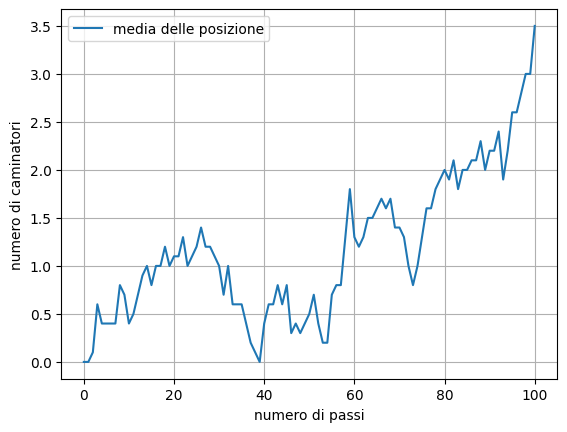

In [808]:

#2-
test = function(100, 20)
test_1 = test[0]
test_2 = test[1]

sns.lineplot(test_1, label = "media delle posizione")
plt.grid(True)
plt.xlabel("numero di passi")
plt.ylabel("numero di caminatori")
plt.show()



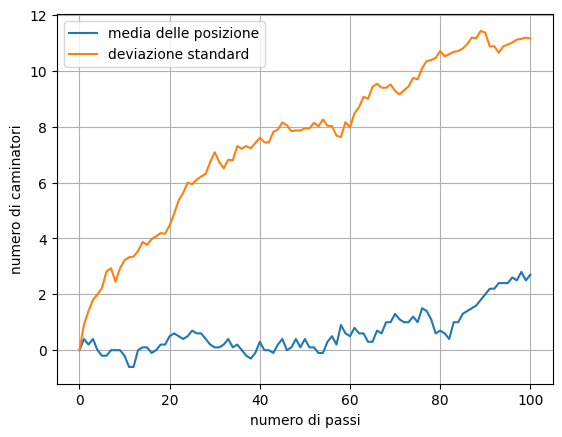

No! la deviazione standard aumenta all'aumentazione del campione.
Maggiore è il numero di passaggi, maggiore è la deviazione standard.


In [809]:
test = function(100, 20)
test_1 = test[0]
test_2 = test[1]

sns.lineplot(test_1, label = "media delle posizione")
sns.lineplot(test_2, label="deviazione standard")
plt.grid(True)
plt.xlabel("numero di passi")
plt.ylabel("numero di caminatori")
plt.show()
print("No! la deviazione standard aumenta all'aumentazione del campione.")
print("Maggiore è il numero di passaggi, maggiore è la deviazione standard.")


## Esercizio 3

Genera un array `a` di dimensioni **5 x 9** contenente numeri da una distribuzione gaussiana con media 0 e dev standard 1.  
Per ogni riga, seleziona il numero **più vicino a 0.1**.
Imposta il seed per la riproducibilità `np.random.seed(42)`

 *Suggerimento*: per ottenere `a[i, j]`, l'array `i` deve contenere gli **indici di riga** corrispondenti agli elementi in `j`.


In [810]:
np.random.seed(42)
a = np.random.normal(0,1, size=(5,9))
x = 0.1
dist = np.abs(a-x)
min_position = dist.argmin(axis=1)
col = range(5)
vicino = a[col, min_position]
vicino

array([-0.1382643 ,  0.24196227,  0.11092259, -0.01349722,  0.17136828])

## Esercizio 4

Utilizza il dataset `titanic`, disponibile all'url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"

Esegui un’analisi esplorativa sui dati dei passeggeri, focalizzandoti su tariffe, età e componenti familiari.

1. **Visualizza i primi 10 passeggeri ordinati per tariffa pagata** (`Fare`), dal più alto al più basso.

2. **Calcola la media** di:
   - `Age` (età)
   - `Fare` (tariffa)
   - `SibSp` (numero di fratelli/coniugi a bordo)

3. **Crea una nuova colonna** chiamata `Family_index`, definita come:

   $$
   \texttt{family\_index} = \frac{\texttt{sibsp} + \texttt{parch}}{\texttt{fare}}
   $$

   *(Indicatore del “peso familiare” per unità di spesa – attenzione a eventuali divisioni per zero!)*

4. Trova il **passeggero con il valore massimo** di `Family_index`.

5. **Filtra solo i passeggeri** che hanno pagato **più di 100** di tariffa (`Fare > 100`).

6. **Crea un grafico a barre** con i 10 passeggeri che hanno pagato di più (`Fare`).

7. **Crea un grafico a linee** dell’età (`Age`), ordinando i passeggeri per tariffa (`Fare`) crescente.



💡 *Suggerimenti*:
- Ricordati di gestire eventuali valori mancanti in `Age` o `Fare` prima di fare operazioni.


In [811]:
import pandas as pd

df = pd.read_csv(r"C:\Users\delma\OneDrive\Bureau\titanic.csv")
df["Age"] = df["Age"].fillna(df["Age"].mean())
df["fare"] = df["Fare"].fillna(df["Fare"].mean())
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,fare
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,7.2500
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,71.2833
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,7.9250
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,53.1000
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,8.0500


In [812]:
#1-
df = df.sort_values(by="Fare", ascending= False)
df.head(10)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,fare
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C,512.3292
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C,512.3292
737,738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C,512.3292
88,89,1,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,263.0000,C23 C25 C27,S,263.0000
438,439,0,1,"Fortune, Mr. Mark",male,64.0,1,4,19950,263.0000,C23 C25 C27,S,263.0000
341,342,1,1,"Fortune, Miss. Alice Elizabeth",female,24.0,3,2,19950,263.0000,C23 C25 C27,S,263.0000
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0000,C23 C25 C27,S,263.0000
742,743,1,1,"Ryerson, Miss. Susan Parker ""Suzette""",female,21.0,2,2,PC 17608,262.3750,B57 B59 B63 B66,C,262.3750
311,312,1,1,"Ryerson, Miss. Emily Borie",female,18.0,2,2,PC 17608,262.3750,B57 B59 B63 B66,C,262.3750
299,300,1,1,"Baxter, Mrs. James (Helene DeLaudeniere Chaput)",female,50.0,0,1,PC 17558,247.5208,B58 B60,C,247.5208


In [813]:

#2-
df.loc[:,["Age","Fare", "SibSp"]].mean()


Age      29.699118
Fare     32.204208
SibSp     0.523008
dtype: float64

In [814]:

#3-
df.isnull().sum()
df["Family_index"] = (df["SibSp"] + df["Parch"]) / df["Fare"]
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,fare,Family_index
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C,512.3292,0.001952
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C,512.3292,0.000000
737,738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C,512.3292,0.000000
88,89,1,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,263.0000,C23 C25 C27,S,263.0000,0.019011
438,439,0,1,"Fortune, Mr. Mark",male,64.0,1,4,19950,263.0000,C23 C25 C27,S,263.0000,0.019011


In [815]:

#4-
max_pass = max(df["Family_index"])
df[df["Family_index"]  == max_pass]


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,fare,Family_index
68,69,1,3,"Andersson, Miss. Erna Alexandra",female,17.0,4,2,3101281,7.925,NaN,S,7.925,0.757098


In [816]:

#5-
df[df["Fare"] > 100]


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,fare,Family_index
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.000000,0,1,PC 17755,512.3292,B51 B53 B55,C,512.3292,0.001952
258,259,1,1,"Ward, Miss. Anna",female,35.000000,0,0,PC 17755,512.3292,NaN,C,512.3292,0.000000
737,738,1,1,"Lesurer, Mr. Gustave J",male,35.000000,0,0,PC 17755,512.3292,B101,C,512.3292,0.000000
88,89,1,1,"Fortune, Miss. Mabel Helen",female,23.000000,3,2,19950,263.0000,C23 C25 C27,S,263.0000,0.019011
438,439,0,1,"Fortune, Mr. Mark",male,64.000000,1,4,19950,263.0000,C23 C25 C27,S,263.0000,0.019011
341,342,1,1,"Fortune, Miss. Alice Elizabeth",female,24.000000,3,2,19950,263.0000,C23 C25 C27,S,263.0000,0.019011
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.000000,3,2,19950,263.0000,C23 C25 C27,S,263.0000,0.019011
742,743,1,1,"Ryerson, Miss. Susan Parker ""Suzette""",female,21.000000,2,2,PC 17608,262.3750,B57 B59 B63 B66,C,262.3750,0.015245
311,312,1,1,"Ryerson, Miss. Emily Borie",female,18.000000,2,2,PC 17608,262.3750,B57 B59 B63 B66,C,262.3750,0.015245
299,300,1,1,"Baxter, Mrs. James (Helene DeLaudeniere Chaput)",female,50.000000,0,1,PC 17558,247.5208,B58 B60,C,247.5208,0.004040


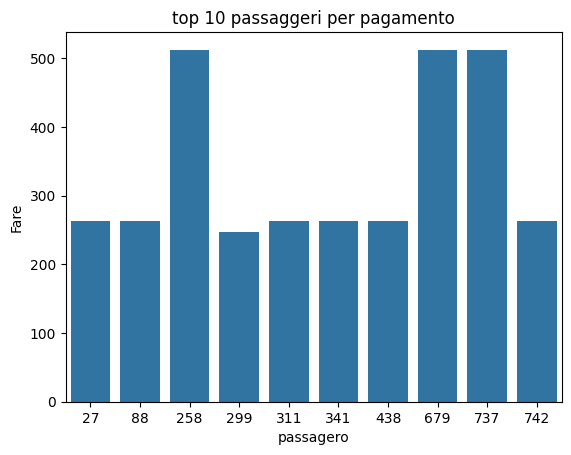

In [817]:

#6-
top_10_passengers = df["Fare"].head(10).reset_index()
top_10_passengers
sns.barplot(x=top_10_passengers["index"], y=top_10_passengers["Fare"])
plt.title("top 10 passaggeri per pagamento")
plt.xlabel("passagero")
plt.ylabel("Fare")
plt.show()


<Axes: ylabel='Age'>

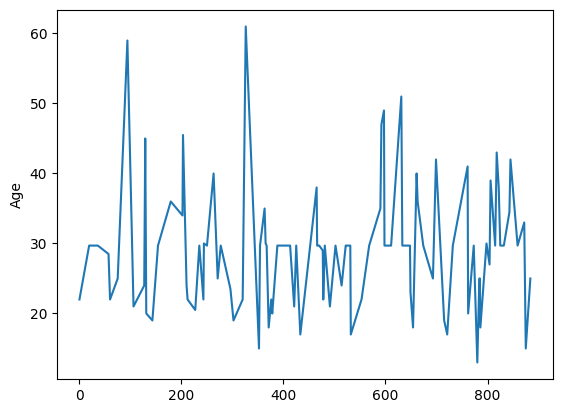

In [818]:

#7-
df = df.sort_values(by="Fare", ascending=True)
df
sns.lineplot(df["Age"].head(100))


## Esercizio 5

Usa il dataset `penguins`, disponibile tramite `seaborn.load_dataset("penguins")`.


1. Quante righe e colonne ha il dataset?

2. Controlla quanti valori mancanti ci sono per colonna.

3. Riempi i valori mancanti nella colonna `sex` con il valore più frequente.

4. Rimuovi le righe in cui il valore `body_mass_g` è mancante.

5. Controlla se ci sono righe duplicate.

6. Calcola la **massa corporea media** (`body_mass_g`) per ogni specie (`species`).
  Se ci sono valori mancanti in `body_mass_g`, riempili con la media della specie.

7. Visualizza la **distribuzione della massa corporea** (`body_mass_g`) per specie.

8.  Visualizza la **distribuzione della massa corporea** per specie, **dividendo per sesso** (`sex`) e mostrandoli a confronto.


💡 Suggerimento: usa `seaborn.violinplot()`, `boxplot()` o `kdeplot()` con `hue='sex'`.


In [819]:
import seaborn as sns
data = sns.load_dataset("penguins")
data.head()


,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [820]:

#1-
data.shape
print("Il dateset ha {} righe e {} colonne".format(data.shape[0], data.shape[1]))


Il dateset ha 344 righe e 7 colonne


In [821]:

#2-
data.isna().sum()


species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64

In [822]:

#3-
data["sex"] = data["sex"].fillna(data["sex"].mode()[0])
data["sex"].isna().sum().item()


0

In [823]:

#4-
data = data[data["body_mass_g"].isna() == False]
data


,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male
...,...,...,...,...,...,...,...
338,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,Female
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


In [824]:

#5-
data.duplicated().sum().item()


0

In [825]:

#6-
data.groupby("species")["body_mass_g"].mean()


species
Adelie       3700.662252
Chinstrap    3733.088235
Gentoo       5076.016260
Name: body_mass_g, dtype: float64

<Axes: xlabel='body_mass_g', ylabel='Count'>

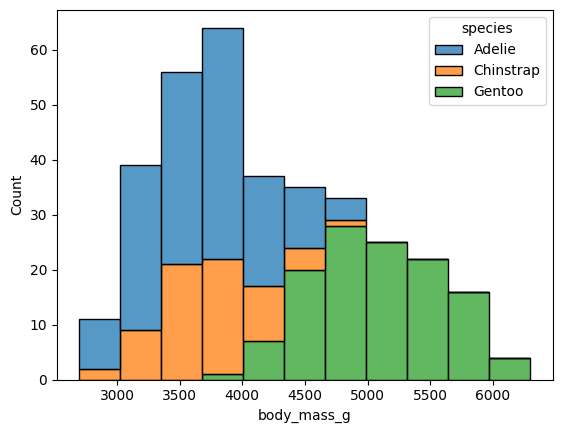

In [826]:
#7-
sns.histplot(data=data, x="body_mass_g", hue="species", multiple="stack" )
## sns.boxplot(data=data,y= "body_mass_g", x= "species")


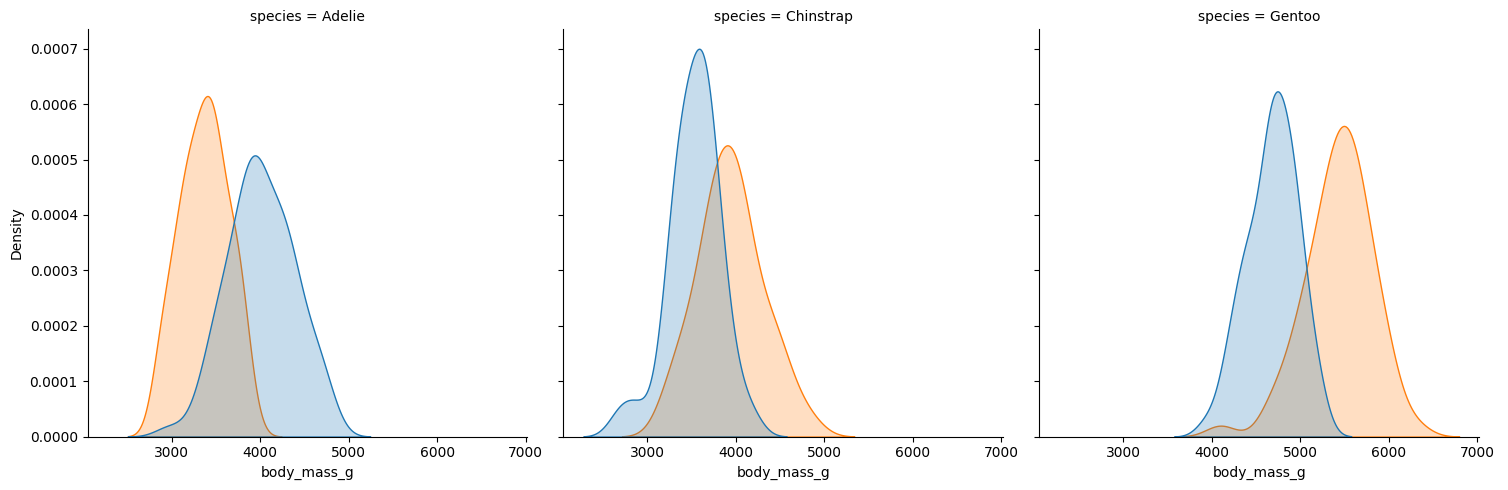

In [827]:

#8-
# sns.kdeplot(data=data, x="body_mass_g", hue="sex", multiple="stack")
graphics = sns.FacetGrid(data, col="species",col_wrap= 3, height=5)
graphics.map_dataframe(sns.kdeplot, x= "body_mass_g", hue="sex", fill=True)
graphics.add_legend()
plt.show()



## Esercizio 6

Hai due array NumPy generati come segue:

`x = np.linspace(0, 10, 100)`  
`y = 3 * x + 2 + np.random.normal(0, 1, 100)`

Scrivi una funzione `fit_line(x, y)` che:

- usa `scipy.optimize.curve_fit` per eseguire un **fitting lineare** del tipo `y = a * x + b`;  
- restituisce una tupla contenente:
  - i **parametri ottimizzati** `a` e `b`;  
  - una **stringa** che descrive la retta trovata, ad esempio: `"y = 3.02 * x + 1.95"`.


Esempio di output atteso:   (3.02, 1.95, "y = 3.02 * x + 1.95")

Fai un esempio di utilizzo dove poi plotti i dati e la curva ottenuta.


In [828]:
from scipy.optimize import curve_fit

np.random.seed(23)
x = np.linspace(0, 10, 100)  
y = 3 * x + 2 + np.random.normal(0, 1, 100)

def model(x, a, b):
    return a*x +b

def fit_line(x, y):
    params, covariance = curve_fit(model, x , y)
    a, b = params
    res = "y = {} * x + {}".format(round(a,2),round(b,2))
    return round(a,2).item(), round(b,2).item(), res

fit_line(x,y)


(3.03, 1.96, 'y = 3.03 * x + 1.96')

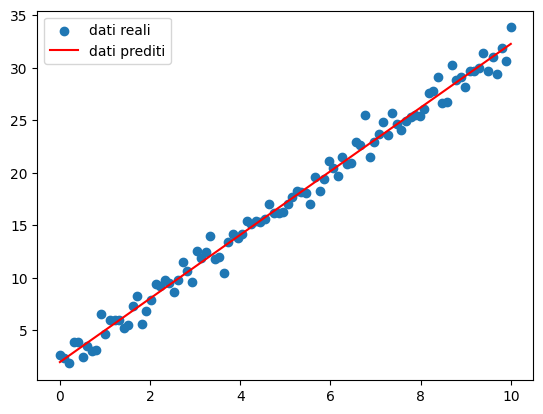

In [829]:

#2-
a,b, _= fit_line(x,y)
y_pred = model(x,a,b )
plt.scatter(x,y, label = "dati reali")
plt.plot(x, y_pred, color = 'red', label = "dati prediti")
plt.legend()
plt.show()